<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(3_6)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_3.6'

In [4]:
os.listdir(base_path)

['data_add_delta_3.6_n250.csv',
 'data_add_delta_3.6_n120.csv',
 'data_add_delta_3.6_n60.csv',
 'data_add_delta_3.6_n30.csv',
 'data_add_delta_3.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,39.287244,62.946350,799.474436,911.708031,247.553138,664.154892
1,0.0,1.0,57.699009,48.164059,1583.076205,1698.939272,86.025844,1612.913428
2,0.0,2.0,44.669595,28.713167,-239.284622,-155.901860,587.359322,-743.261182
3,0.0,3.0,64.210181,58.879910,709.507414,842.597506,-177.387922,1019.985428
4,0.0,4.0,25.745559,84.356823,-892.311454,-772.209072,230.002059,-1002.211131
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,89.749866,78.565355,4371.364434,4549.679654,1055.998383,3493.681271
119996,999.0,116.0,66.013287,23.163761,-288.313513,-189.136465,-99.652712,-89.483753
119997,999.0,117.0,43.455359,92.429670,-2741.575514,-2595.690485,1229.596925,-3825.287410
119998,999.0,118.0,50.653756,73.036145,1455.654923,1589.344825,859.377953,729.966872


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,39.287244,62.946350,799.474436,911.708031,247.553138,664.154892
1,0.0,1.0,57.699009,48.164059,1583.076205,1698.939272,86.025844,1612.913428
2,0.0,2.0,44.669595,28.713167,-239.284622,-155.901860,587.359322,-743.261182
3,0.0,3.0,64.210181,58.879910,709.507414,842.597506,-177.387922,1019.985428
4,0.0,4.0,25.745559,84.356823,-892.311454,-772.209072,230.002059,-1002.211131
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,89.749866,78.565355,4371.364434,4549.679654,1055.998383,3493.681271
119996,999.0,116.0,66.013287,23.163761,-288.313513,-189.136465,-99.652712,-89.483753
119997,999.0,117.0,43.455359,92.429670,-2741.575514,-2595.690485,1229.596925,-3825.287410
119998,999.0,118.0,50.653756,73.036145,1455.654923,1589.344825,859.377953,729.966872


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    39.287244  62.946350   799.474436   911.708031   247.553138   
      1.0    57.699009  48.164059  1583.076205  1698.939272    86.025844   
      2.0    44.669595  28.713167  -239.284622  -155.901860   587.359322   
      3.0    64.210181  58.879910   709.507414   842.597506  -177.387922   
      4.0    25.745559  84.356823  -892.311454  -772.209072   230.002059   
...                ...        ...          ...          ...          ...   
999.0 115.0  89.749866  78.565355  4371.364434  4549.679654  1055.998383   
      116.0  66.013287  23.163761  -288.313513  -189.136465   -99.652712   
      117.0  43.455359  92.429670 -2741.575514 -2595.690485  1229.596925   
      118.0  50.653756  73.036145  1455.654923  1589.344825   859.377953   
      119.0  41.181180  23.272296   231.817752   306.271227  -152.449536   

                   e_hat  
rep   index               
0.0   0.0     664.154892  
      1.0    1612.913428  
      2.0    -743.261182  
      3.0    1019.985428  
      4.0   -1002.211131  
...                  ...  
999.0 115.0  3493.681271  
      116.0   -89.483753  
      117.0 -3825.287410  
      118.0   729.966872  
      119.0   458.720763  

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    39.287244  62.946350   799.474436   911.708031   247.553138   
      1.0    57.699009  48.164059  1583.076205  1698.939272    86.025844   
      2.0    44.669595  28.713167  -239.284622  -155.901860   587.359322   
      3.0    64.210181  58.879910   709.507414   842.597506  -177.387922   
      4.0    25.745559  84.356823  -892.311454  -772.209072   230.002059   
...                ...        ...          ...          ...          ...   
999.0 115.0  89.749866  78.565355  4371.364434  4549.679654  1055.998383   
      116.0  66.013287  23.163761  -288.313513  -189.136465   -99.652712   
      117.0  43.455359  92.429670 -2741.575514 -2595.690485  1229.596925   
      118.0  50.653756  73.036145  1455.654923  1589.344825   859.377953   
      119.0  41.181180  23.272296   231.817752   306.271227  -152.449536   

                   e_hat  
rep   index               
0.0   0.0     664.154892  
      1.0    1612.913428  
      2.0    -743.261182  
      3.0    1019.985428  
      4.0   -1002.211131  
...                  ...  
999.0 115.0  3493.681271  
      116.0   -89.483753  
      117.0 -3825.287410  
      118.0   729.966872  
      119.0   458.720763  

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,39.287244,62.946350,799.474436,911.708031,247.553138,664.154892
1,0.0,1.0,57.699009,48.164059,1583.076205,1698.939272,86.025844,1612.913428
2,0.0,2.0,44.669595,28.713167,-239.284622,-155.901860,587.359322,-743.261182
3,0.0,3.0,64.210181,58.879910,709.507414,842.597506,-177.387922,1019.985428
4,0.0,4.0,25.745559,84.356823,-892.311454,-772.209072,230.002059,-1002.211131
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,89.749866,78.565355,4371.364434,4549.679654,1055.998383,3493.681271
119996,999.0,116.0,66.013287,23.163761,-288.313513,-189.136465,-99.652712,-89.483753
119997,999.0,117.0,43.455359,92.429670,-2741.575514,-2595.690485,1229.596925,-3825.287410
119998,999.0,118.0,50.653756,73.036145,1455.654923,1589.344825,859.377953,729.966872


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    39.287244  62.946350   799.474436   911.708031   247.553138   
      1.0    57.699009  48.164059  1583.076205  1698.939272    86.025844   
      2.0    44.669595  28.713167  -239.284622  -155.901860   587.359322   
      3.0    64.210181  58.879910   709.507414   842.597506  -177.387922   
      4.0    25.745559  84.356823  -892.311454  -772.209072   230.002059   
...                ...        ...          ...          ...          ...   
999.0 115.0  89.749866  78.565355  4371.364434  4549.679654  1055.998383   
      116.0  66.013287  23.163761  -288.313513  -189.136465   -99.652712   
      117.0  43.455359  92.429670 -2741.575514 -2595.690485  1229.596925   
      118.0  50.653756  73.036145  1455.654923  1589.344825   859.377953   
      119.0  41.181180  23.272296   231.817752   306.271227  -152.449536   

                   e_hat  
rep   index               
0.0   0.0     664.154892  
      1.0    1612.913428  
      2.0    -743.261182  
      3.0    1019.985428  
      4.0   -1002.211131  
...                  ...  
999.0 115.0  3493.681271  
      116.0   -89.483753  
      117.0 -3825.287410  
      118.0   729.966872  
      119.0   458.720763  

[120000 rows x 6 columns]

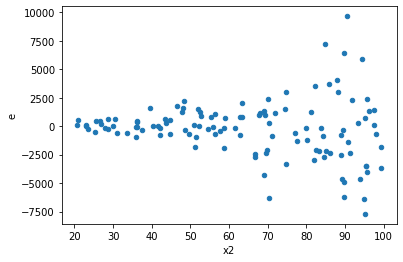

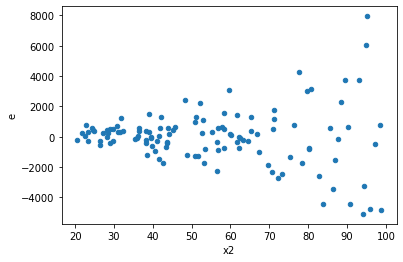

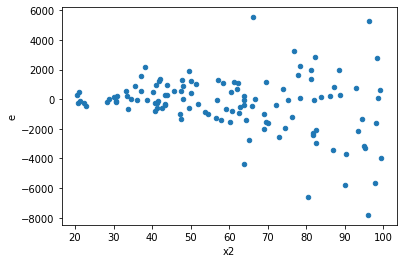

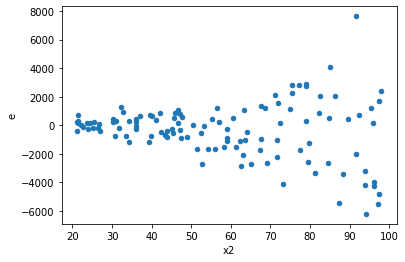

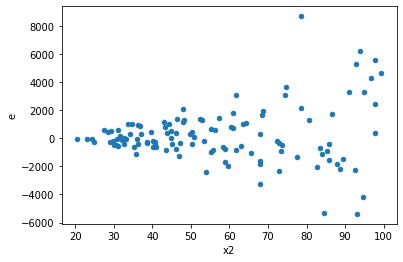

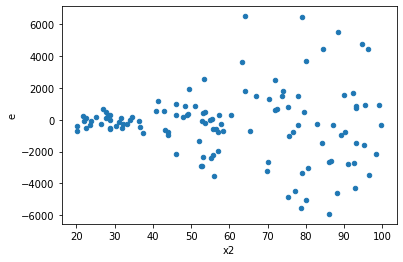

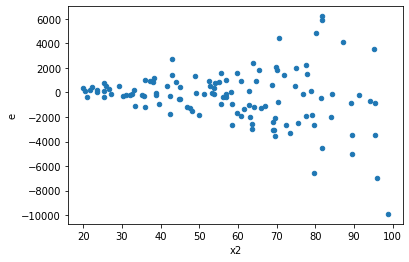

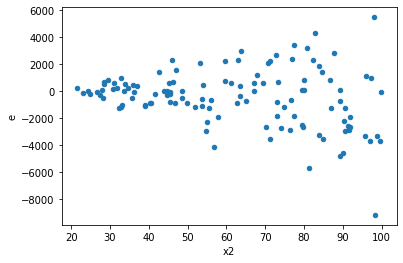

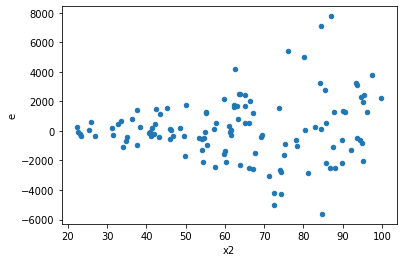

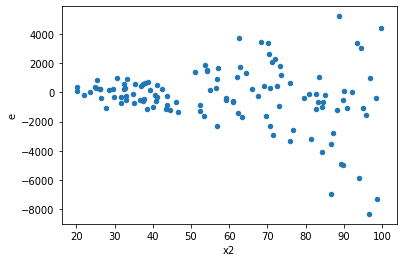

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,46.0,46.0,14015372.588442776,397369152.45827556,304682.01279223425,8638459.83604947,28.352378786272894,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
8.0,46.0,46.0,98720239.66415334,327058539.0515009,2146092.166612029,7109968.24025002,3.312983641086726,8.536909827228101e-05,0.9999573154508639,4.2684549136140504e-05,Reject005=0 : Heteroscedasticity
10.0,46.0,46.0,142453021.90807083,355471290.5179986,3096804.824088496,7727636.750391274,2.4953580187817623,0.002420341928140113,0.9987898290359299,0.0012101709640700564,Reject005=0 : Heteroscedasticity
11.0,46.0,46.0,118778341.54581988,192453676.33020476,2582137.8596917363,4183775.5723957554,1.6202758333341767,0.10524487056947907,0.9473775647152605,0.05262243528473953,Reject005=1 : Homoscedasticity
12.0,46.0,46.0,175572674.34858838,231817702.64567608,3816797.2684475733,5039515.274906002,1.320351834394325,0.34937715070748876,0.8253114246462556,0.17468857535374438,Reject005=1 : Homoscedasticity
13.0,46.0,46.0,65952226.75957361,333141416.655243,1433744.0599907306,7242204.709896587,5.051253506112806,1.961575331055343e-07,0.9999999019212334,9.807876655276715e-08,Reject005=0 : Heteroscedasticity
15.0,46.0,46.0,25104224.9750831,467220602.1996974,545744.0211974587,10156969.613036899,18.611233872522714,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
17.0,46.0,46.0,32172704.135128353,382448564.943414,699406.6116332251,8314099.237900304,11.887361514192104,4.418687638008123e-14,0.9999999999999779,2.2093438190040615e-14,Reject005=0 : Heteroscedasticity
19.0,46.0,46.0,31755569.18619574,546276544.726463,690338.4605694726,11875577.059270933,17.202543009807908,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,385554186.2889714,132159662.90621978,8381612.745412422,2873036.1501352126,0.34277844102350535,0.00041477407691179613,Reject005=0 : Heteroscedasticity
1.0,46.0,46.0,273501533.3671957,75458328.92311668,5945685.507982516,1640398.4548503626,0.27589727923685303,2.593561111342302e-05,Reject005=0 : Heteroscedasticity
2.0,46.0,46.0,344700498.30043495,25311281.50732506,7493489.093487716,550245.2501592404,0.07342977927831189,2.991612412941881e-15,Reject005=0 : Heteroscedasticity
3.0,46.0,46.0,381635426.70933914,21525403.04641638,8296422.319768243,467943.5444873126,0.056403052599229835,1.4000891797192494e-17,Reject005=0 : Heteroscedasticity
4.0,46.0,46.0,14015372.588442776,397369152.45827556,304682.01279223425,8638459.83604947,28.352378786272894,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,46.0,46.0,378049668.8142288,113614206.72249876,8218471.061178886,2469874.0591847557,0.300527195484274,8.067899320325484e-05,Reject005=0 : Heteroscedasticity
6.0,46.0,46.0,441988383.1218029,34999350.435035616,9608443.111343542,760855.4442399048,0.07918613196987695,1.3417868122282555e-14,Reject005=0 : Heteroscedasticity
7.0,46.0,46.0,347534192.51257586,30172589.818894356,7555091.1415777365,655925.8656281382,0.08681905397783998,8.173369346908834e-14,Reject005=0 : Heteroscedasticity
8.0,46.0,46.0,98720239.66415334,327058539.0515009,2146092.166612029,7109968.24025002,3.312983641086726,8.536909827228101e-05,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    777
Reject005=1 : Homoscedasticity      223
Name: Result_test, dtype: int64